In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas openml

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn

# Práctica 4: EDA en Series de Tiempo

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado se llama _Digital Currency_ y puede leer su descripción en la siguiente liga

https://www.openml.org/d/43748

In [3]:
# Descarga la metadata del dataset
dataset_info = openml.datasets.get_dataset(43748, download_data=False)

# Obtiene el nombre de la columna a predecir
target = dataset_info.default_target_attribute

(
    features, # Dataframe con las características que se pueden utilizar para predecir
    outputs, # Columna a predecir
    categorical_mask, # Máscara que indica que columnas de todas las características son categoricas
    columns # Lista con el nombre de las características
)= dataset_info.get_data(
    dataset_format="dataframe", target=target
)

categorical_mask = np.array(categorical_mask)
columns = np.array(columns)

In [4]:
print(f"La columna a predecir se llama '{target}'")
print(f"Todas las características son {str(columns)}")
print(f"Las características categóricas son {str(columns[categorical_mask])}")
print(f"Las características numéricas son {str(columns[~categorical_mask])}")

La columna a predecir se llama 'None'
Todas las características son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']
Las características categóricas son []
Las características numéricas son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']


In [5]:
# Impresión de las características
features

,City,Center,Date,Year,Month,Season,PM1_0,PM2_5,PM10,Temperature_F,Humidity_%,AQI,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,Yangon,7 Miles Mayangone,10/20/2019 0:00,2019,October,Rainy Season,29.60,44.27,52.87,95.67,49.64,122.59,0,0,0,0
1,Yangon,7 Miles Mayangone,10/21/2019 0:00,2019,October,Rainy Season,25.22,37.49,45.21,94.42,51.67,105.90,0,0,0,0
2,Yangon,7 Miles Mayangone,10/22/2019 0:00,2019,October,Rainy Season,24.46,35.84,42.32,95.40,49.26,101.84,0,0,0,0
3,Yangon,7 Miles Mayangone,10/23/2019 0:00,2019,October,Rainy Season,23.42,34.53,41.37,96.39,48.06,98.17,0,0,0,0
4,Yangon,7 Miles Mayangone,10/24/2019 0:00,2019,October,Rainy Season,38.29,56.55,68.59,93.70,57.11,151.54,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,Mandalay,Jefferson Center,10/27/2020 0:00,2020,October,Rainy Season,19.50,31.46,37.68,93.33,55.19,91.71,1426,46200,27,1122
5118,Mandalay,Jefferson Center,10/28/2020 0:00,2020,October,Rainy Season,17.36,27.30,31.57,94.07,54.33,82.97,1466,47666,25,1147
5119,Mandalay,Jefferson Center,10/29/2020 0:00,2020,October,Rainy Season,15.30,24.34,27.73,93.45,57.17,76.74,1406,49072,25,1172
5120,Mandalay,Jefferson Center,10/30/2020 0:00,2020,October,Rainy Season,10.18,16.20,18.90,92.64,52.21,59.62,1331,50403,27,1199


## Asignación 1 &#x1F625;

Plantee 2 preguntas que le parezcan interesantes a resolver con este dataset.
- ¿Qué contaminante predomina más en la temporada de calor?
- ¿Qué centros tienen una mayor tendencia de crecimiento en PM10, PM2.5 y PM1.0?

## Asignación 2 &#x1F921;

Apoyado de las técnicas vistas en clase, realice un análisis exploratorio de datos (EDA) que le permita responder de manera guiada las preguntas planteadas anteriormente. Debe apoyarse de visualizaciones y métricas para respaldar sus respuestas.

In [6]:
features["Date"] = pd.to_datetime(features["Date"])
features["week"] = features["Date"].dt.isocalendar().week

<AxesSubplot:xlabel='Date', ylabel='AQI'>

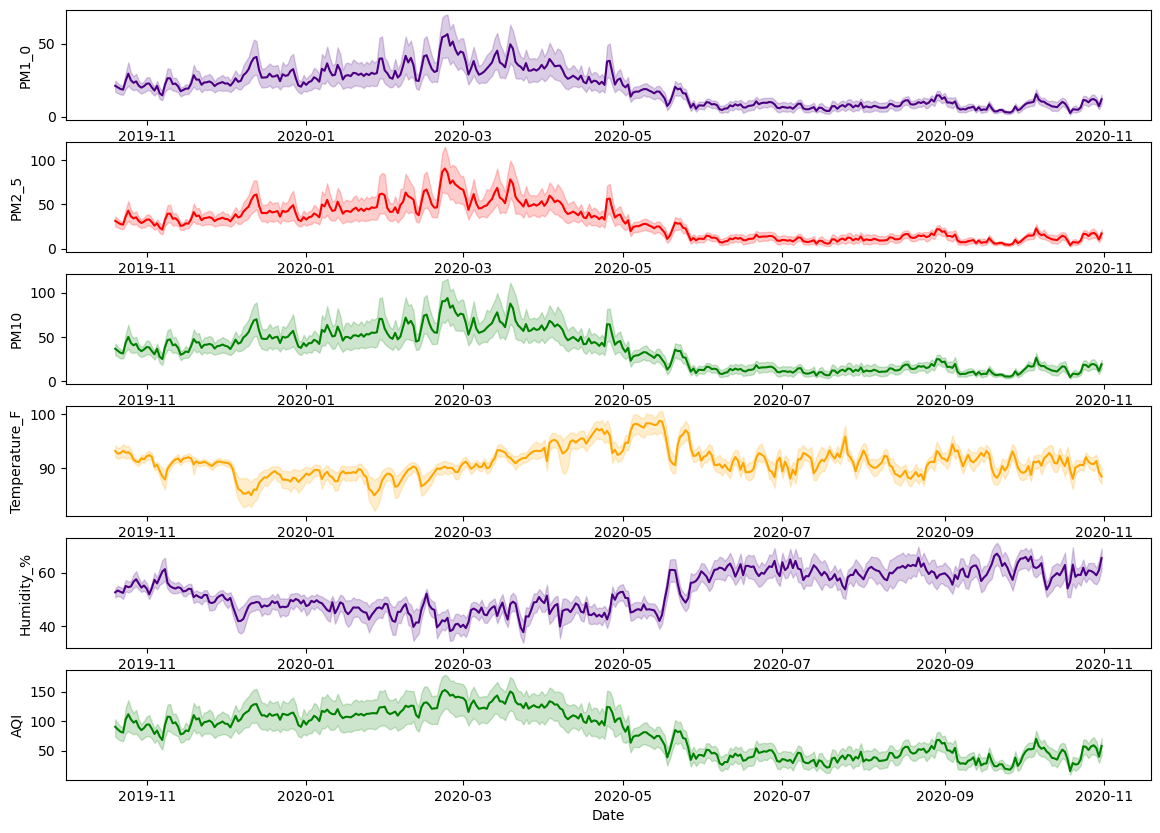

In [7]:
fig, axs = plt.subplots(ncols=1, nrows= 6, figsize=(14, 10))

sns.lineplot(data=features, x="Date", y="PM1_0", color = "indigo", ax = axs[0])
sns.lineplot(data=features, x="Date", y="PM2_5", color = "red", ax = axs[1])
sns.lineplot(data=features, x="Date", y="PM10", color = "green", ax = axs[2])
sns.lineplot(data=features, x="Date", y="Temperature_F", color = "orange", ax = axs[3])
sns.lineplot(data=features, x="Date", y="Humidity_%", color = "indigo", ax = axs[4])
sns.lineplot(data=features, x="Date", y="AQI", color = "green", ax = axs[5])

<AxesSubplot:xlabel='Date', ylabel='value'>

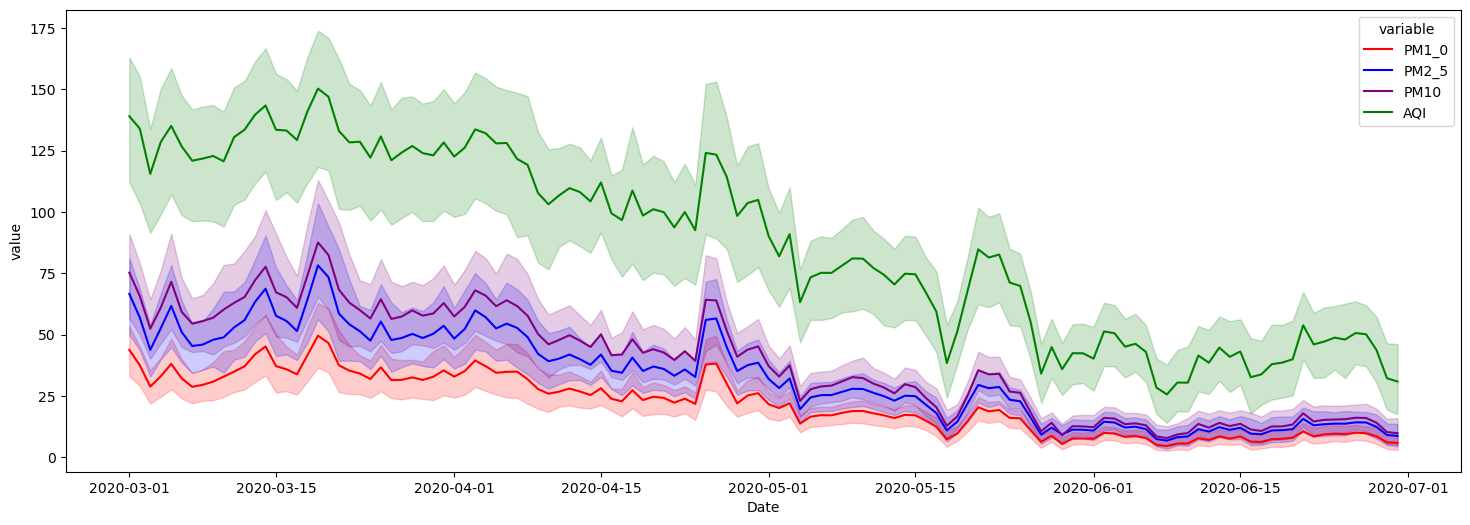

In [8]:
plt.figure(figsize=(18,6))
data_hot = features[features["Season"] == "Hot Season"]
sns.lineplot(x = 'Date', y = 'value', hue = 'variable',
    data = pd.melt(data_hot[['PM1_0', 'PM2_5', 'PM10', 'AQI', 'Date']], ['Date']),
    palette=['red', 'blue', 'purple', 'green'])

<AxesSubplot:xlabel='Month', ylabel='AQI'>

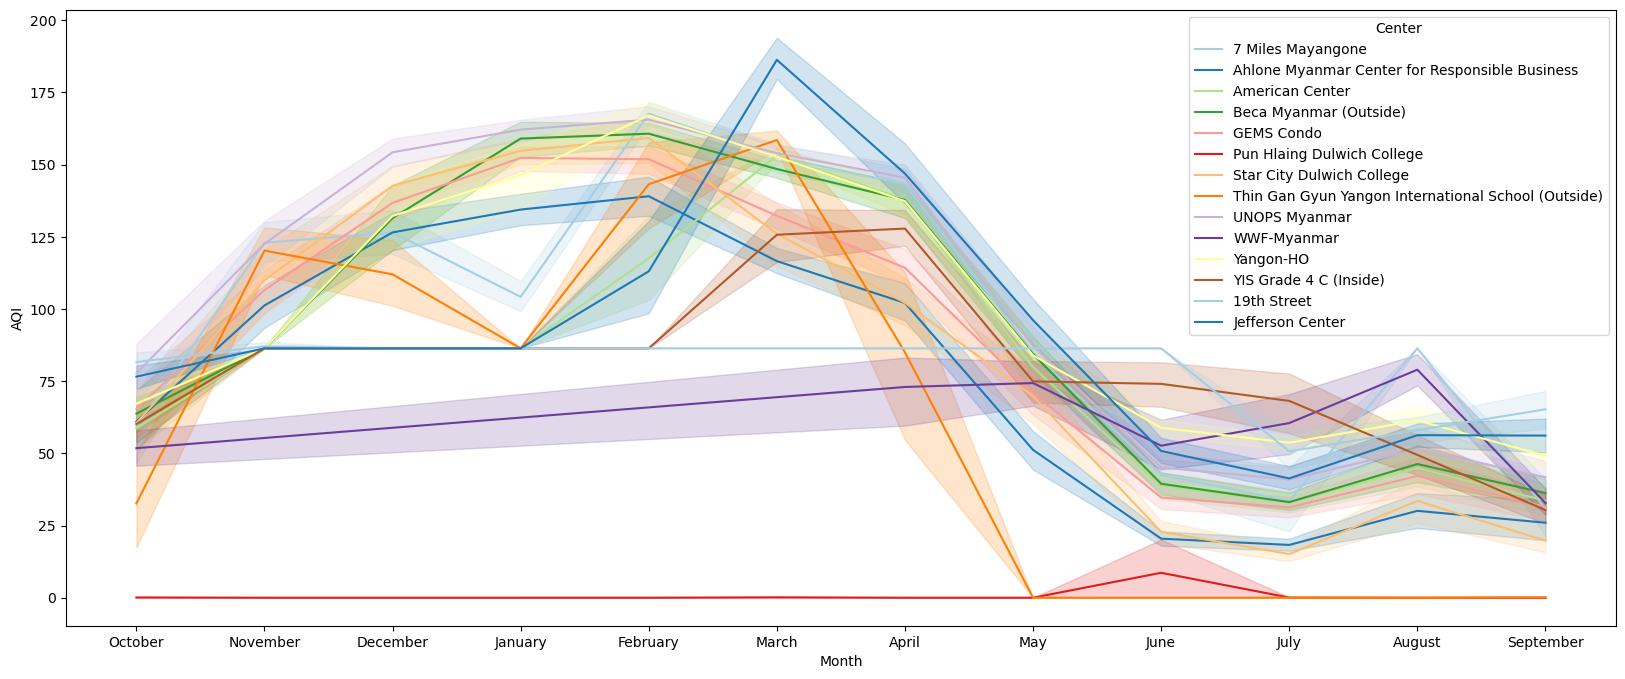

In [9]:
plt.figure(figsize=(20,8))
sns.lineplot(x="Month", y="AQI", hue="Center", data=features, palette="Paired")

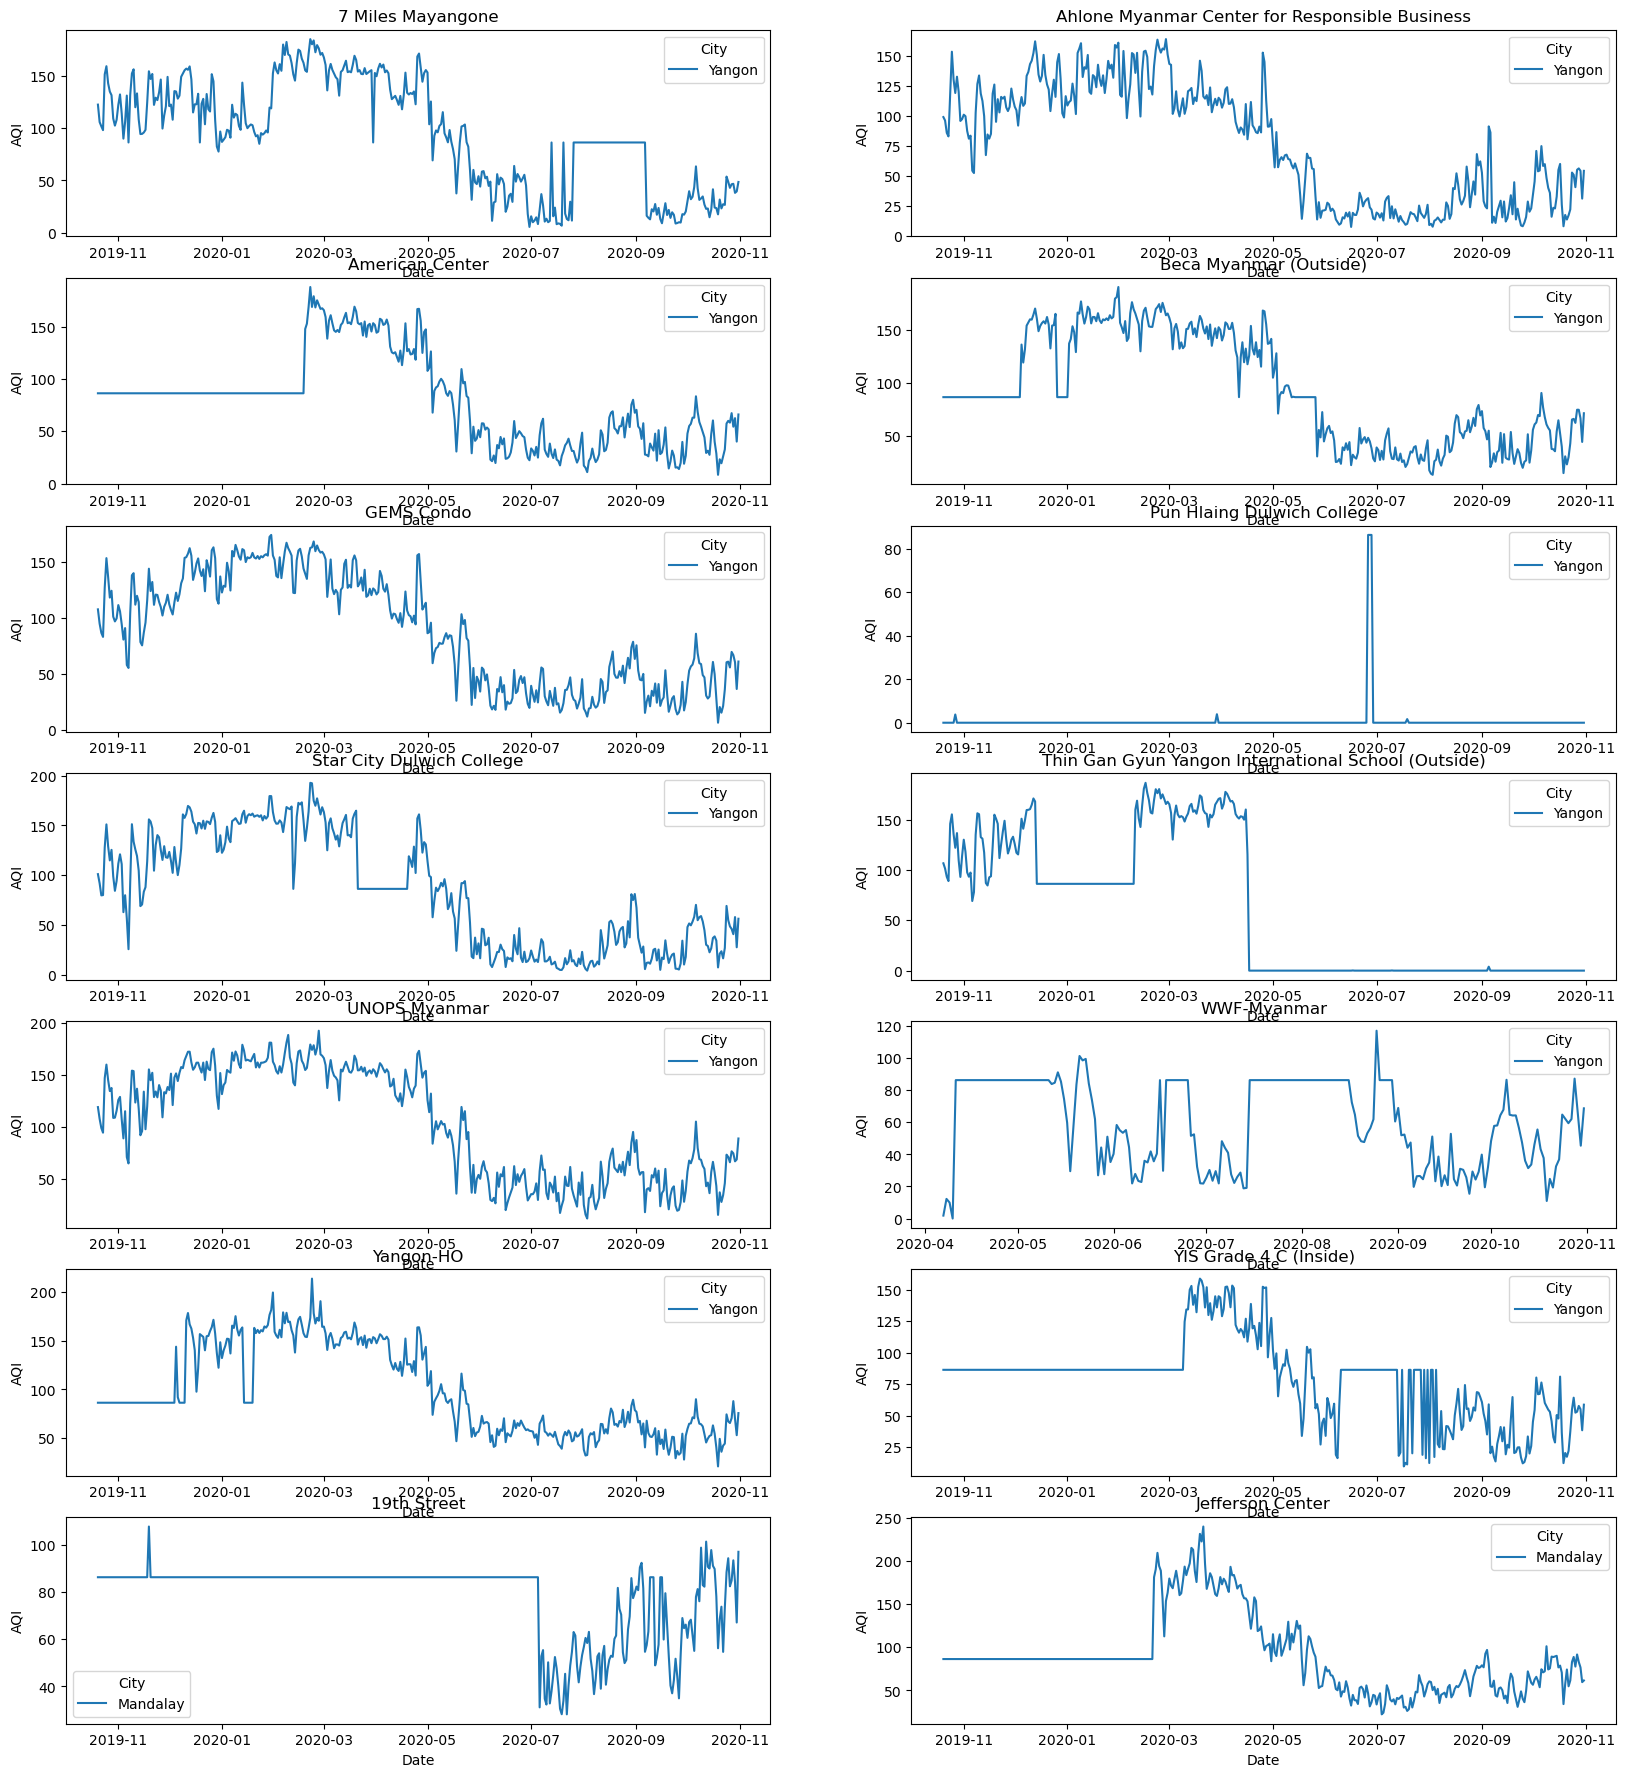

In [10]:
centers = features["Center"].unique()
fig, axs = plt.subplots(ncols=2, nrows= 7, figsize=(20, 22))

for i, col in enumerate(centers):
    sns.lineplot(data = features[features["Center"] == col], 
        x = "Date", y="AQI", hue="City", ax = axs[i // 2, i % 2]).set(title=col)

In [11]:
data_centers = features[
    (features["Center"] == '7 Miles Mayangone') |
    (features["Center"] == 'Ahlone Myanmar Center for Responsible Business') |
    (features["Center"] == 'GEMS Condo') |
    (features["Center"] == 'UNOPS Myanmar')
]

In [12]:
def smooth_time_series(
    time_series: np.array,
    mask_size: int=2
) -> np.array:
    
    smooth_time_series = np.zeros(len(time_series))
    
    # CÓDIGO AQUÍ 
    size = len(time_series)

    for t in range(size):
        if t + 1 > mask_size and t + 1 + mask_size < size:
            smooth_time_series[t] = np.sum(time_series[t-mask_size:t+mask_size,])/mask_size*2
        else:
            smooth_time_series[t] = time_series[t]
    
    return smooth_time_series

In [13]:
data_centers["AQI_smt"] = smooth_time_series(data_centers["AQI"].values, 3)

/tmp/ipykernel_4633/1050234990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_centers["AQI_smt"] = smooth_time_series(data_centers["AQI"].values, 3)


El promedio de  7 Miles Mayangone es 94.78738095238094
El promedio de  Ahlone Myanmar Center for Responsible Business es 76.55153439153439
El promedio de  GEMS Condo es 88.25492063492064
El promedio de  UNOPS Myanmar es 102.9988888888889


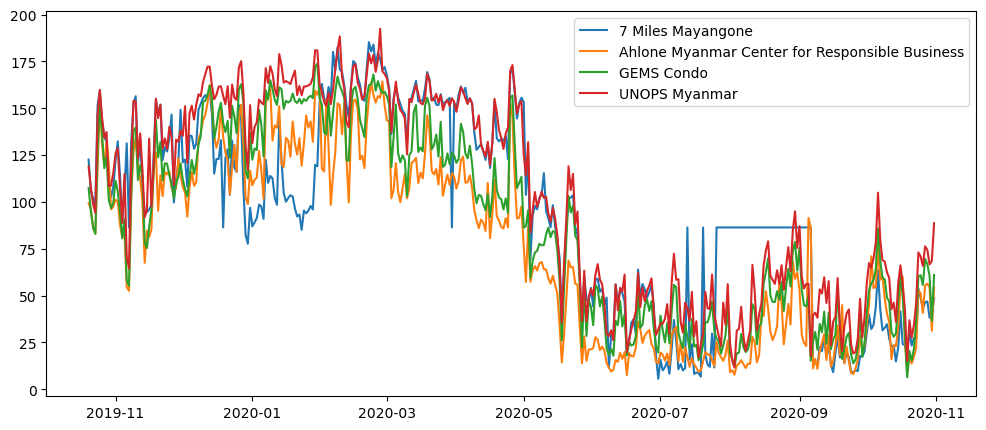

In [26]:
plt.figure(figsize=(12,5))
for i, col in enumerate(centers):
    print("El promedio de ", col, "es", data_centers[data_centers["Center"] == col]["AQI"].mean())
    plt.plot(data_centers[data_centers["Center"] == col]["Date"], 
    data_centers[data_centers["Center"] == col]["AQI"], 
    label = col, linestyle="-")
plt.legend()
plt.show()

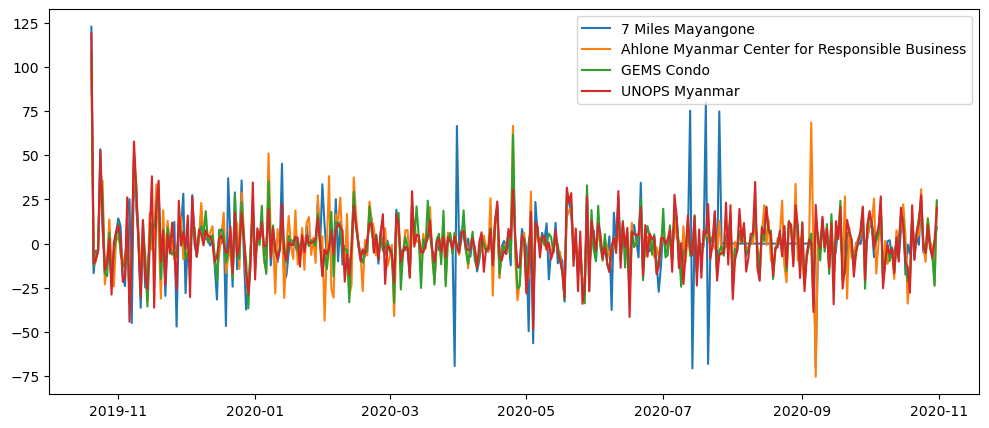

In [29]:
plt.figure(figsize=(12,5))
centers = data_centers["Center"].unique()

for i in centers:
    center_t = data_centers[data_centers["Center"] == i]
    center = center_t["AQI"].values
    center_smt = np.zeros(len(center))
    for t, j in enumerate(center):
        if t != 0:
            center_smt[t] = center[t] - center[t-1]
        else:
            center_smt[t] = j
    plt.plot(center_t["Date"], center_smt, label = i)
plt.legend()
plt.show()


In [ ]:
def crossvariance(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
) -> Union[List[float], float]:
    
    # CÓDIGO AQUI
    media_time1 = np.mean(time_series_1)
    media_time2 = np.mean(time_series_2)

    size = len(time_series_1)
    
    crossvariances = np.zeros(len(lags))
    for i, lag in enumerate(lags):
        sumxy = []
        for t in range(lag, size):
            sumxy.append(((time_series_2[t-lag] - media_time2) * (time_series_1[t] - media_time1)))

        crossvariances[i] =  np.mean(sumxy)
    return crossvariances
    

In [ ]:
def crosscorrelation(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
)-> float:
    
    media_time1 = np.mean(time_series_1)
    media_time2 = np.mean(time_series_2)

    size = len(time_series_1)
    
    if type(lags) == int:
        sumxy = []
        for t in range(lags, size):
            sumxy.append((time_series_2[t-lags] - media_time2) * (time_series_1[t] - media_time1))

        return np.mean(sumxy)
    else:
        crossvariances = np.zeros(len(lags))
        for i, lag in enumerate(lags):
            sumxy = []
            for t in range(lag, size):
                sumxy.append(((time_series_2[t-lag] - media_time2) * (time_series_1[t] - media_time1)))

            crossvariances[i] =  np.mean(sumxy)
        return crossvariances

In [ ]:
def normalize_dataframe(data):
    data_scaled = data
    for i in data.columns:
        if data[i].dtype == 'int64' or data[i].dtype == 'float64':
            media = np.sum(data[i])/len(data[i])
            sd = np.std(data[i])
            data_scaled[i] = (data[i] - media)/sd

    return data_scaled

In [ ]:
features = normalize_dataframe(features)

In [ ]:
def correlogram_std(df, name_series, lags):
    colors = ["red", "orange", "yellow"]
    stds = np.array([2, 2.5, 3])
    lags = range(0, lags)

    values = crosscorrelation(df[name_series[0]], df[name_series[1]], lags)
    stdc = (len(df[name_series[0]])**-0.5)
    stds = stds * stdc

    # Correlograma
    fig, ax = plt.subplots()
    ax.stem(lags, values)

    for std, col in zip(stds, colors):
        ax.axhline(y=std, ls='--', c=col)
        ax.axhline(y=-std, ls='--', c=col)
    plt.show()

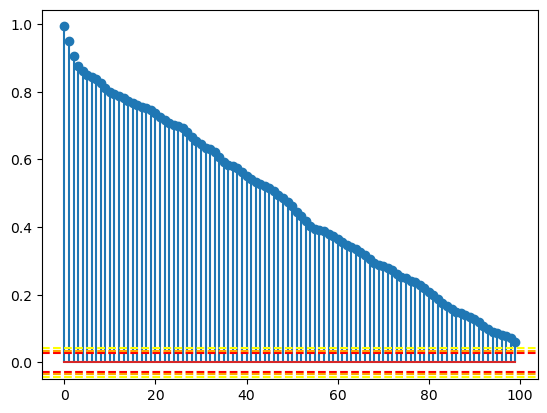

In [ ]:
correlogram_std(data_centers, ["PM2_5", "PM10"], 100)

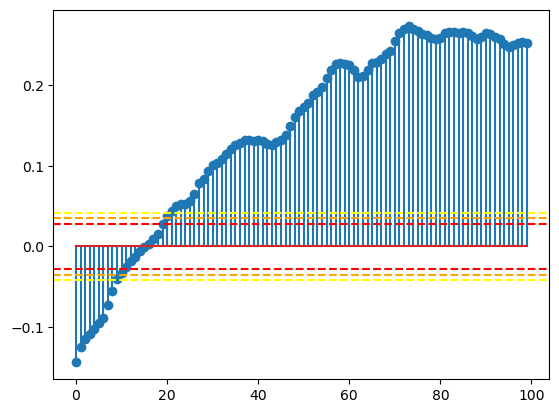

In [ ]:
correlogram_std(data_centers, ["Temperature_F", "PM10"], 100)

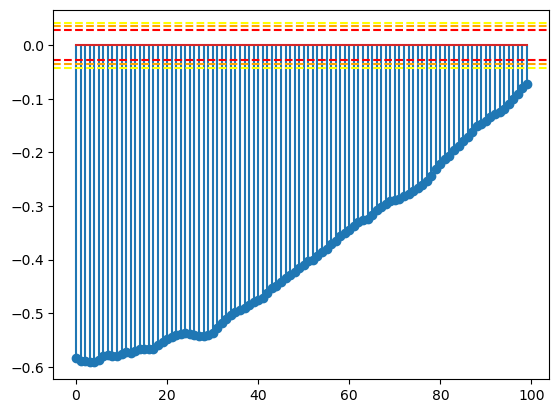

In [ ]:
correlogram_std(data_centers, ["Humidity_%", "AQI"], 100)